# Problema das 8 Rainhas

O problema das 8 rainhas é um desafio clássico na área de computação. O objetivo é posicionar 8 rainhas em um tabuleiro de xadrez de 8x8 células, de forma que nenhuma rainha possa atacar as outras. Isso significa que nenhuma rainha deve compartilhar a mesma linha, coluna ou diagonal com outra.

## Representação do Problema

### Tabuleiro
O tabuleiro é representado por uma matriz 8x8 onde cada posição pode conter uma rainha ou ser vazia.
Sendo assim, resolvi representar cada indivíduo como uma lista de 8 posições [1, 2, 3, 4, 5, 6, 7, 8], onde cada posição contém o índice da casa que a rainha está, caso [1, 4, 6, 2, 5, 3, 7, 8]:

| 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 |   |
|---|---|---|---|---|---|---|---|---|
|   |   |   |   |   |   |   | Q | 8 |
|   |   |   |   |   |   | Q |   | 7 |
|   |   | Q |   |   |   |   |   | 6 |
|   |   |   |   | Q |   |   |   | 5 |
|   | Q |   |   |   |   |   |   | 4 |
|   |   |   |   |   | Q |   |   | 3 |
|   |   |   | Q |   |   |   |   | 2 |
| Q |   |   |   |   |   |   |   | 1 |


## Parâmetros do Algoritmo Genético (atividade)

| Aspecto                 | Detalhes                         |
|-------------------------|----------------------------------|
| Representação           | Inteira                          |
| Recombinação            | Cruzamento de um ponto           |
| Mutação                 | Swap                             |
| Seleção dos pais        | 2 melhores de 5 aleatórios       |
| Seleção de sobreviventes| Substituir os piores             |
| Tamanho da população    | 100                              |
| Número de descendentes  | 2                                |
| Inicialização           | Aleatória                        |
| Critério de Parada      | 1000 gerações                    |


### Importações 

In [17]:
import random
import matplotlib.pyplot as plt

### Funções

In [18]:
def criar_populacao(tamanho_populacao):
    populacao = []                                                  # lista que representa um individuo
    for _ in range(tamanho_populacao):
        individuo = list(range(1, 9))                               # gera o individuo
        random.shuffle(individuo)                                   # randomiza a posição do indivíduo
        populacao.append(individuo)
    return populacao                                                 # retorna a lista de indivíduos 

def calcular_fitness(individuo):
    ataques = 0
    tamanho_tabuleiro = len(individuo)

    for i in range(tamanho_tabuleiro):
        for j in range(i + 1, tamanho_tabuleiro):
            # Verifica se as rainhas se atacam na mesma linha ou diagonal
            if individuo[i] == individuo[j] or abs(individuo[i] - individuo[j]) == abs(i - j):
                ataques += 1
    fitness = tamanho_tabuleiro * (tamanho_tabuleiro - 1) // 2 - ataques
    return fitness

def calcular_fitness_medio(populacao):
    total_fitness = 0

    for individuo in populacao:
        total_fitness += calcular_fitness(individuo)
    
    # Calcula o fitness médio dividindo o total pelo número de indivíduos na população
    fitness_medio = total_fitness / len(populacao)
    return fitness_medio

def selecionar_mais_baixos(populacao, qtd_selec, qtd_melhores):
    # Seleciona aleatoriamente 5 indivíduos da população
    selecionados = random.sample(populacao, qtd_selec)

    # Ordena os indivíduos selecionados com base no seu fitness
    selecionados = sorted(selecionados, key=calcular_fitness)

    # Retorna os 2 indivíduos com o fitness mais auto
    mais_baixos = selecionados[qtd_melhores:]
    return mais_baixos

def mutacao_swap(individuo):
    # Seleciona aleatoriamente duas posições diferentes no indivíduo
    pos1, pos2 = random.sample(range(len(individuo)), 2)

    # Realiza a troca de posições das rainhas
    individuo[pos1], individuo[pos2] = individuo[pos2], individuo[pos1]

    return individuo

# Mutação (Swap)
def mutacao_swap(individuo):
    posicao1, posicao2 = random.sample(range(len(individuo)), 2)
    individuo[posicao1], individuo[posicao2] = individuo[posicao2], individuo[posicao1]
    return individuo

def cruzamento_e_mutacao(pai1, pai2):
    # Cruzamento de um ponto para gerar dois filhos
    filho1, filho2 = cruzamento_um_ponto(pai1, pai2)
    
    # Aplica mutação por swap nos filhos gerados
    filho1_mutado = mutacao_swap(filho1)
    filho2_mutado = mutacao_swap(filho2)
    
    return [filho1_mutado, filho2_mutado]

def substituir_por_melhores(populacao, novos_individuos):
    # Ordena os novos indivíduos com base no seu fitness
    novos_individuos.sort(key=calcular_fitness)

    # Ordena a população atual com base no seu fitness
    populacao.sort(key=calcular_fitness)

    # Substitui os indivíduos menos aptos da população pelos novos indivíduos (de maior fitness)
    for i in range(len(novos_individuos)):
        populacao[i] = novos_individuos[i]

    return populacao

def mostrar_grafico(listas, labels):
    geracoes = range(len(listas[0]))  # Assume-se que todas as listas têm o mesmo comprimento

    for i, lista in enumerate(listas):
        plt.plot(geracoes, lista, label=labels[i], linewidth=1)

    plt.xlabel('Geração')
    plt.ylabel('Fitness')
    plt.title('Gráfico de Linhas com Múltiplas Séries')
    plt.legend()
    plt.show()

def encontrar_maior_fitness(populacao):
    maior_fitness = 0  # Inicializa com um valor grande
    individuo_maior_fitness = None

    for individuo in populacao:
        fitness_atual = calcular_fitness(individuo)
        if fitness_atual > maior_fitness:
            maior_fitness = fitness_atual
            individuo_maior_fitness = individuo

    return individuo_maior_fitness, maior_fitness

def cruzamento_dois_pontos(pai1, pai2):

    ponto_corte1 = random.randint(1, len(pai1) - 1)
    ponto_corte2 = random.randint(ponto_corte1 + 1, len(pai1))
    
    filho1 = pai1[:ponto_corte1] + pai2[ponto_corte1:ponto_corte2] + pai1[ponto_corte2:]
    filho2 = pai2[:ponto_corte1] + pai1[ponto_corte1:ponto_corte2] + pai2[ponto_corte2:]

    return [filho1, filho2]

# Recombinação (Cruzamento de um ponto)
def cruzamento_um_ponto(pai1, pai2):
    ponto_corte = random.randint(1, len(pai1) - 1)
    filho1 = pai1[:ponto_corte] + pai2[ponto_corte:]
    filho2 = pai2[:ponto_corte] + pai1[ponto_corte:]
    return [filho1, filho2]

def cruzamento_dois_pontos_com_swap(pai1, pai2):
    ponto_corte1 = random.randint(1, len(pai1) - 1)
    ponto_corte2 = random.randint(ponto_corte1 + 1, len(pai1))

    filho1 = pai1[:ponto_corte1] + pai2[ponto_corte1:ponto_corte2] + pai1[ponto_corte2:]
    filho2 = pai2[:ponto_corte1] + pai1[ponto_corte1:ponto_corte2] + pai2[ponto_corte2:]

    filho1_mutado = mutacao_swap(filho1)
    filho2_mutado = mutacao_swap(filho2)

    return [filho1_mutado, filho2_mutado]

In [19]:

def algoritmo_genetico(qtd_pop, qtg_gem, qtd_selec, qtd_melhores, modelo):
    populacao = criar_populacao(qtd_pop)
    medio_fit = []

    for x in range(qtg_gem):
        selec = selecionar_mais_baixos(populacao, qtd_selec, qtd_melhores)
        mutados = []

        if modelo == "Cruzamento_dois_pontos":
            mutados = cruzamento_dois_pontos(selec[0], selec[1])

        elif modelo == "Cruzamento":
            mutados = cruzamento_um_ponto(selec[0], selec[1])

        elif modelo == "Cruzamento_sw":
            mutados = cruzamento_e_mutacao(selec[0], selec[1])

        elif modelo == "Cruzamento_dois_pontos_com_swap":
            mutados = cruzamento_dois_pontos_com_swap(selec[0], selec[1])

        populacao = substituir_por_melhores(populacao, mutados)
        medio_fit.append(calcular_fitness_medio(populacao))
    
    return medio_fit, encontrar_maior_fitness(populacao)

### Main

Melhor: [5, 1, 4, 6, 8, 2, 7, 3], resultado: 28, Tecnica: Cruzamento
Melhor: [4, 2, 7, 5, 1, 8, 6, 3], resultado: 28, Tecnica: Cruzamento_sw
Melhor: [5, 8, 4, 1, 7, 2, 6, 3], resultado: 28, Tecnica: cruzamento_dois_pontos
Melhor: [2, 7, 3, 6, 8, 5, 1, 4], resultado: 28, Tecnica: cruzamento_dois_pontos_com_swap


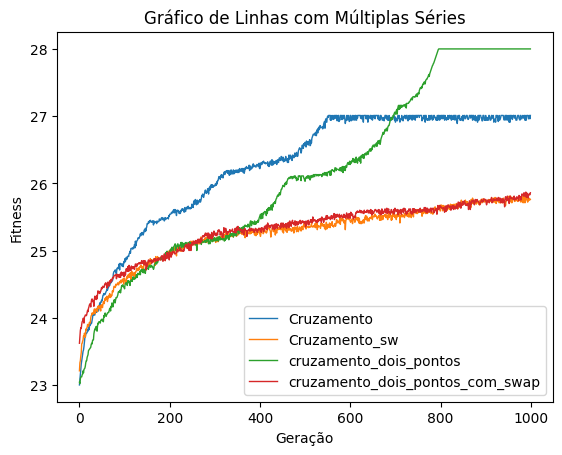

In [20]:
numero_gens = 1000
numero_selec = 5
numero_melhores = 2
numero_pop = 100

# Exemplo de uso do algoritmo genético com suas funções definidas
listas = []
labels = []
melhores = []

jogada = algoritmo_genetico(numero_pop, numero_gens, numero_selec, numero_melhores, "Cruzamento")
listas.append(jogada[0])
melhores.append(jogada[1])
labels.append("Cruzamento")

jogada = algoritmo_genetico(numero_pop, numero_gens, numero_selec, numero_melhores, "Cruzamento_sw")
listas.append(jogada[0])
melhores.append(jogada[1])
labels.append("Cruzamento_sw")

jogada = algoritmo_genetico(numero_pop, numero_gens, numero_selec, numero_melhores, "Cruzamento_dois_pontos")
listas.append(jogada[0])
melhores.append(jogada[1])
labels.append("cruzamento_dois_pontos")

jogada = algoritmo_genetico(numero_pop, numero_gens, numero_selec, numero_melhores, "Cruzamento_dois_pontos_com_swap")
listas.append(jogada[0])
melhores.append(jogada[1])
labels.append("cruzamento_dois_pontos_com_swap")

for x in melhores:
    print(f"Melhor: {x[0]}, resultado: {x[1]}, Tecnica: {labels[melhores.index(x)]}")
mostrar_grafico(listas, labels)